# Converting Polygon Masks to Pixel Masks
By Leah Scherschel and Yingnan Ju - Indiana University

## Import packages

In [1]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


## Load polygon mask .json file

In [3]:
json_filename = '../Colonic_crypt_dataset/test/CL_HandE_1234_B004_bottomleft.json'
read_file = open(json_filename, "r") 
data = json.load(read_file)
#data[0]


In [4]:
polys = []
for index in range(data.__len__()):
    geom = np.array(data[index]['geometry']['coordinates'])
    polys.append(geom.astype(int))
#polys

## Provide the shape of the image in pixels: (height, width)

In [5]:
shape = (4536, 4704)


## Convert the polygon vector into a pixel mask

### Method 1

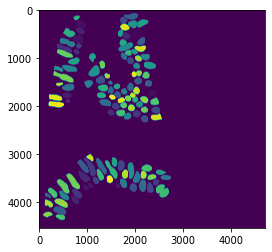

In [6]:
mask_1 = np.zeros(shape)
for i in range(len(polys)):
    cv2.fillPoly(mask_1, polys[i], i+1)

plt.imshow(mask_1)

In [8]:
np.unique(mask_1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124.])

### Method 2

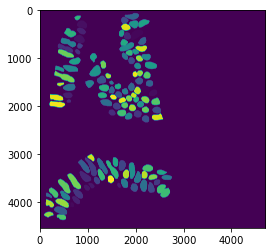

In [6]:
Image.MAX_IMAGE_PIXELS = None
img = Image.new('L', (shape[1], shape[0]), 0)  # (w, h)
for i in range(len(polys)):
    poly = polys[i]
    ImageDraw.Draw(img).polygon(tuple(map(tuple, poly[0])), outline=i + 1, fill=i + 1) 

mask_2 = np.array(img)
plt.imshow(mask_2)